In [ ]:
import pandas as pd
from math import ceil, floor
import numpy as np
from scipy import optimize as opt, stats as sts
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from  matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs, load_breast_cancer, make_regression, make_classification
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, recall_score, mean_absolute_error, r2_score, classification_report, mean_squared_error as mse, RocCurveDisplay, roc_curve, roc_auc_score
from sklearn.linear_model import RidgeClassifierCV, SGDClassifier, RidgeClassifier, RidgeCV, LassoCV, Lasso, Ridge, LinearRegression, LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer, normalize, OneHotEncoder, LabelEncoder
%matplotlib inline
import time

Задание 1

In [ ]:
X, y = make_classification(n_samples=250, class_sep = 1.5, n_features=2, n_informative=2, n_redundant=0, random_state=2, n_clusters_per_class=1)

Сгенерировали набор значений с данными параметрами.

In [ ]:
print(f'Координаты точек: {X[:10]}')
print(f'Метки точек: {y[:10]}')

Координаты точек: [[ 0.79235315  1.83566145]
 [-2.66719436  1.46633237]
 [ 0.21054762  2.9547488 ]
 [-1.32307025  1.76742301]
 [-2.28714439  0.30677602]
 [ 2.72960273  0.35223846]
 [ 1.03691228  2.14055455]
 [ 1.46505767  2.96881815]
 [-2.32038637  1.64047555]
 [-0.62413735  3.6335935 ]]
Метки точек: [1 0 1 0 0 1 1 0 0 1]


Это для 10 значений, так как 250 выводить будет слишком много.

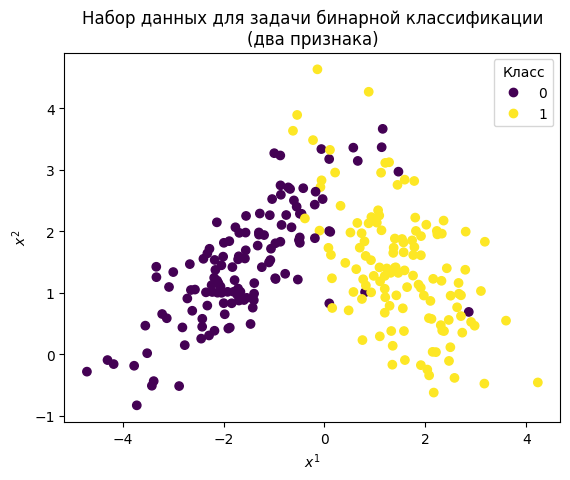

In [ ]:
scatter = plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('$x^1$')
plt.ylabel('$x^2$')
plt.legend(*scatter.legend_elements(), title='Класс')
plt.title('Набор данных для задачи бинарной классификации\n(два признака)')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
print(f'Веса: {model.coef_}\nСв. коэф.: {model.intercept_}')

Веса: [[ 2.15413685 -0.09609322]]
Св. коэф.: [0.07488133]


Формула модели - $\pi(x) = \dfrac {e^{\langle \bar w, \bar x \rangle}}{1+e^{\langle \bar w, \bar x \rangle}}$

Где <w,x> = 0.075 + 2.15*x1 - 0.096*x2

Правило:

 где $[z]=\begin{cases}
   1, &\text{если $Полученный\ \pi >=0.5$ }\\
   0, &\text{если $Полученный\ \pi <0.5$ }
 \end{cases} \; - \; \; $ нотация Айверсона.

In [ ]:
print(f'Обучающая выборка: \nПравильные ответы: {y_train[:15]}\nПредсказания: {model.predict(X_train[:15])}\n\nТестовая выборка: \nПравильные ответы: {y_test[:15]}\nПредсказания: {model.predict(X_test[:15])}\n')

Обучающая выборка: 
Правильные ответы: [0 0 1 1 1 1 0 0 1 1 1 1 1 1 0]
Предсказания: [0 0 1 1 1 0 0 1 1 1 1 1 1 1 0]

Тестовая выборка: 
Правильные ответы: [1 1 1 0 0 0 1 0 0 1 1 1 0 0 0]
Предсказания: [1 1 1 0 0 0 1 0 0 1 1 1 0 0 0]



Можно заметить, что по первым 15ти значениям модел предсказала без ошибок, что дает понять очень хорошую работу модели.

In [ ]:
print('Обучающая выборка: ')
pred_proba = model.predict_proba(X_train)
print('Вероятность принадлежности к классу 0\n', pred_proba[:10, 0])
print('Вероятность принадлежности к классу 1\n', pred_proba[:10, 1])

Обучающая выборка: 
Вероятность принадлежности к классу 0
 [0.99448343 0.94806918 0.01834305 0.00896193 0.06908142 0.834624
 0.97705803 0.1004883  0.01783087 0.0484528 ]
Вероятность принадлежности к классу 1
 [0.00551657 0.05193082 0.98165695 0.99103807 0.93091858 0.165376
 0.02294197 0.8995117  0.98216913 0.9515472 ]


In [ ]:
print('\nТестовая выборка: ')
pred_proba = model.predict_proba(X_test)
print('Вероятность принадлежности к классу 0\n', pred_proba[:10, 0])
print('Вероятность принадлежности к классу 1\n', pred_proba[:10, 1])


Тестовая выборка: 
Вероятность принадлежности к классу 0
 [0.00327551 0.45143521 0.13443865 0.7485799  0.99149691 0.99928313
 0.00290372 0.95404779 0.56122938 0.00674505]
Вероятность принадлежности к классу 1
 [9.96724489e-01 5.48564790e-01 8.65561352e-01 2.51420097e-01
 8.50308923e-03 7.16870684e-04 9.97096278e-01 4.59522141e-02
 4.38770616e-01 9.93254948e-01]


Видно, что модель давала в основном значения близкие к 1, что озачает высокую уверенность. Однако были и значения, не близкие к 1 (в основном в тестовой выбоке), это может оправдаться тем, что выборка была меньше.

In [ ]:
pm = 31 - 1
print(f'Номер объекта: {pm}')
print(f'Предсказание вероятности к классу 1: {pred_proba[pm, 1]}')

Номер объекта: 30
Предсказание вероятности к классу 1: 0.7810009970207556


У нас 0.78 >= 0.5, поэтому предсказание будет на класс 1

In [ ]:
w_1, w_2 = model.coef_[0]
w_0 = model.intercept_[0]
x = np.linspace(min(X[:, 0]), max(X[:, 0]), 1000)
print(w_0, w_1, w_2)
wx = w_0 + w_1*x
sigmoid = np.exp(wx)/(1 + np.exp(wx))

0.07488133489231116 2.154136846937627 -0.09609322198777562


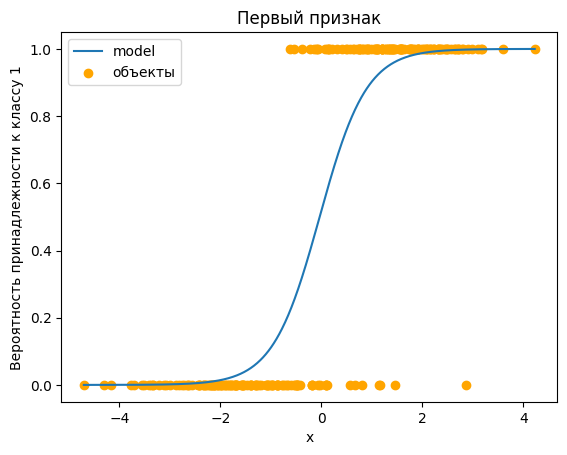

In [ ]:
plt.plot(x, sigmoid, label = "model")
plt.scatter(X[:, 0], y, color = "orange", label = 'объекты')
plt.title('Первый признак')
plt.xlabel('x')
plt.ylabel('Вероятность принадлежности к классу 1')
plt.legend()

In [ ]:
w_1, w_2 = model.coef_[0]
w_0 = model.intercept_[0]
x = np.linspace(min(X[:, 1]), max(X[:, 1]), 1000)
print(w_0, w_1, w_2)
wx = w_0 + w_2*x
sigmoid = np.exp(wx)/(1 + np.exp(wx))

0.07488133489231116 2.154136846937627 -0.09609322198777562


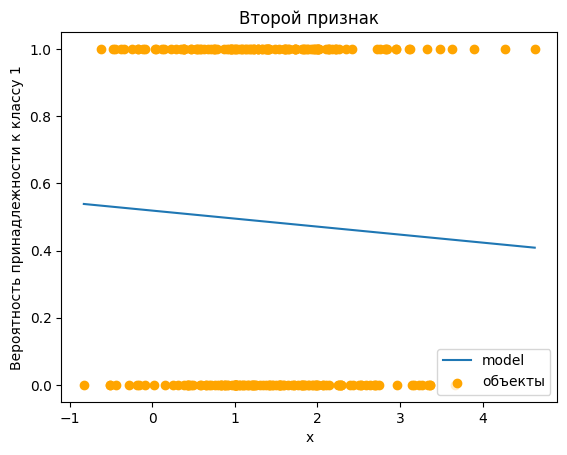

In [ ]:
plt.plot(x, sigmoid, label = "model")
plt.scatter(X[:, 1], y, color = "orange", label = 'объекты')
plt.title('Второй признак')
plt.xlabel('x')
plt.ylabel('Вероятность принадлежности к классу 1')
plt.legend()

In [ ]:
pred_train = model.predict_proba(X_train)[:, 1]
pred_train[pred_train >= 0.5] = 1
pred_train[pred_train < 0.5] = 0

pred_test = model.predict_proba(X_test)[:, 1]
pred_test[pred_test >= 0.5] = 1
pred_test[pred_test < 0.5] = 0

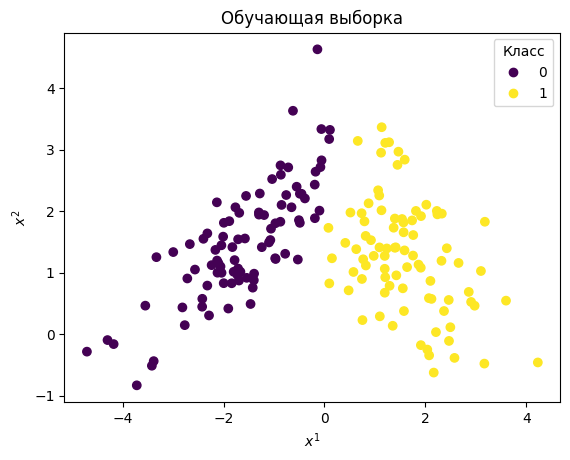

In [ ]:
plt.scatter(X_train[:, 0], X_train[:, 1], c = pred_train,)
plt.xlabel('$x^1$')
plt.ylabel('$x^2$')
plt.legend(*scatter.legend_elements(), title='Класс')
plt.title('Обучающая выборка')
plt.show()

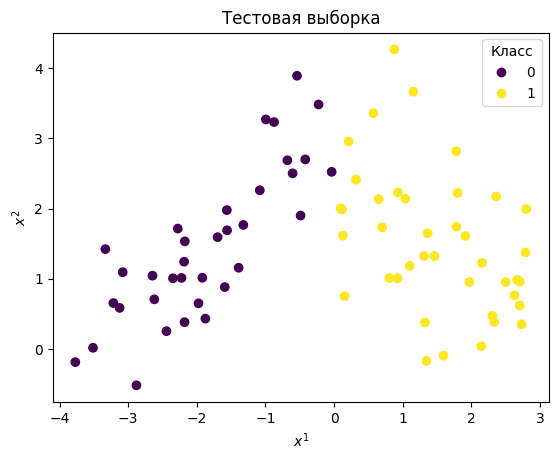

In [ ]:
plt.scatter(X_test[:, 0], X_test[:, 1], c = pred_test)
plt.xlabel('$x^1$')
plt.ylabel('$x^2$')
plt.legend(*scatter.legend_elements(), title='Класс')
plt.title('Тестовая выборка')
plt.show()

In [ ]:
print('На обучающей выборке:')
print('accuracy =', accuracy_score(y_train, model.predict(X_train)))
print('precision =', precision_score(y_train, model.predict(X_train)))
print('recall =', recall_score(y_train, model.predict(X_train)))
print('f-мера =', f1_score(y_train, model.predict(X_train)))
print()
print('На тестовой выборке:')
print('accuracy =', accuracy_score(y_test, model.predict(X_test)))
print('precision =', precision_score(y_test, model.predict(X_test)))
print('recall =', recall_score(y_test, model.predict(X_test)))
print('f-мера =', f1_score(y_test, model.predict(X_test)))

На обучающей выборке:
accuracy = 0.9314285714285714
precision = 0.9411764705882353
recall = 0.9195402298850575
f-мера = 0.9302325581395349

На тестовой выборке:
accuracy = 0.9066666666666666
precision = 0.875
recall = 0.9459459459459459
f-мера = 0.9090909090909091


In [ ]:
fpr1, tpr1, thresholds1 = roc_curve(y_train, pred_train)

fpr2, tpr2, thresholds2 = roc_curve(y_test, pred_test)

In [ ]:
print(f'Обучающая: \n   fpr = {fpr1}\n   tpr = {tpr1}')
print()
print(f'Тестовая: \n   fpr = {fpr2}\n   tpr = {tpr2}')

Обучающая: 
   fpr = [0.         0.05681818 1.        ]
   tpr = [0.         0.91954023 1.        ]

Тестовая: 
   fpr = [0.         0.13157895 1.        ]
   tpr = [0.         0.94594595 1.        ]


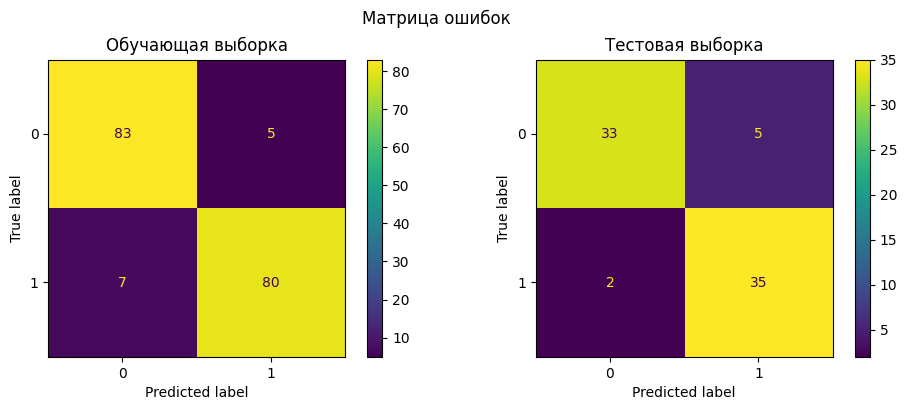

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
plt.suptitle('Матрица ошибок')
# визуализация матрицы ошибок для обучающей выборки
y_pred_train = model.predict(X_train)
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=axes[0])
axes[0].set_title('Обучающая выборка')
# визуализация матрицы ошибок для тестовой выборки
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=axes[1])
axes[1].set_title('Тестовая выборка')
plt.tight_layout()

- Обучающая: TP = 80; TN = 83; FP = 5; FN = 7
- Тестовая: TP = 35; TN = 33; FP = 5; FN = 2
- обучающая: TPR = 0.91954; FPR = 0.05681;
- тестовая: TPR = 0.945; FPR = 0.131578947;

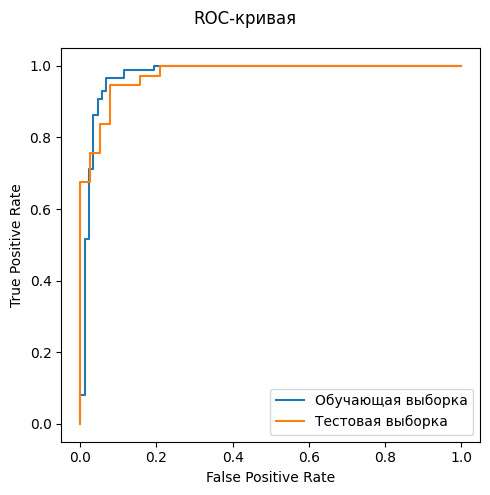

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
plt.suptitle('ROC-кривая')

pred_proba_train = model.predict_proba(X_train)
fpr, tpr, thresholds = roc_curve(y_train, pred_proba_train[:,1])
disp = RocCurveDisplay(fpr=fpr, tpr=tpr)
disp.plot(ax=ax, label='Обучающая выборка')

pred_proba = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:,1])
disp = RocCurveDisplay(fpr=fpr, tpr=tpr)
disp.plot(ax=ax, label='Тестовая выборка')
plt.legend()
plt.tight_layout()

На самом деле, качество моделей довольно хорошее, потому что они близко к 1 (по оси Оу)

In [ ]:
print('На обучающей выборке AUC-ROC =', roc_auc_score(y_train, y_pred_train))
print('На тестовой выборке AUC-ROC =', roc_auc_score(y_test, y_pred))

На обучающей выборке AUC-ROC = 0.9313610240334379
На тестовой выборке AUC-ROC = 0.9071834992887625


Например для обучающей, с вероятность 0.93 объект с классом 1 получит предсказание 1 выше, чем предсказание -1 (0).

В ходе работы мы научились работать с моделями логической регрессии и получать метрики и другие показатели, по которым можем судить о работе обученной модели. В данном случае модель очень хорошо работала.

Задание 2

In [ ]:
data = pd.read_csv("Вариант 2.csv")
data.head()

,Возраст,Пол,Квалификация,Стаж,Семейное положение,Иждивенцы,Срок проживания,Иностранное гражданство,Телефон,Банковский счет,...,Плата за жилье,Кредитный рейтинг,Число кредитов,Другие кредиты,Сумма,Срок,Процентная ставка платежа,Поручители,Цель,Класс
0,44,1,3,2,живет раздельно/разведен,1,4,1,1,-1,...,аренда,0,1,нет,3384,6,1,нет,мебель/оборудование,0
1,40,1,3,4,живет раздельно/разведен,1,3,1,1,1,...,собственность,1,1,нет,4297,18,4,нет,мебель/оборудование,0
2,35,0,2,2,замужем/живет раздельно/разведена,1,2,1,0,-1,...,собственность,2,1,нет,1381,24,4,нет,автомобиль (новый),0
3,28,1,3,1,женат/овдовел,1,4,1,1,1,...,аренда,2,1,нет,9398,36,1,нет,автомобиль (б/у),0
4,41,1,2,4,никогда не состоял(а),2,2,1,0,-1,...,собственность,2,1,банк,2712,36,2,нет,мебель/оборудование,0


In [ ]:
print(f'Размерность: {data.shape}')

Размерность: (600, 22)


In [ ]:
print(*list(data.columns))

Возраст Пол Квалификация Стаж Семейное положение Иждивенцы Срок проживания Иностранное гражданство Телефон Банковский счет Сберегательный счет Собственность Плата за жилье Кредитный рейтинг Число кредитов Другие кредиты Сумма Срок Процентная ставка платежа Поручители Цель Класс


- Возраст - количественный
- Пол - биноминальный
- Квалификация - порядковый
- Стаж количественный
- Семейное положение - номинальный
- Иждивенцы - количественный
- Срок проживания - количественный
- Иностранное гражданство - биноминальный
- Телефон - биноминальный
- Банковский счет - количественный
- Сберегательный счет - количественный
- Собственность - номинальный
- Плата за жилье - номинальный
- Кредитный рейтинг - порядковый
- Число кредитов - количественный
- Другие кредиты - номинальный
- Сумма - количественный
- Срок  количественный
- Процентная ставка платежа - количественный
- Поручители - номинальный
- Цель - номинальный
- Класс - биноминальный

In [ ]:
data.dtypes

Возраст                       int64
Пол                           int64
Квалификация                  int64
Стаж                          int64
Семейное положение           object
Иждивенцы                     int64
Срок проживания               int64
Иностранное гражданство       int64
Телефон                       int64
Банковский счет               int64
Сберегательный счет           int64
Собственность                object
Плата за жилье               object
Кредитный рейтинг             int64
Число кредитов                int64
Другие кредиты               object
Сумма                         int64
Срок                          int64
Процентная ставка платежа     int64
Поручители                   object
Цель                         object
Класс                         int64
dtype: object

Признаки соответствуют значениям в датафрейме

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 0 to 599
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Возраст                    600 non-null    int64 
 1   Пол                        600 non-null    int64 
 2   Квалификация               600 non-null    int64 
 3   Стаж                       600 non-null    int64 
 4   Семейное положение         600 non-null    object
 5   Иждивенцы                  600 non-null    int64 
 6   Срок проживания            600 non-null    int64 
 7   Иностранное гражданство    600 non-null    int64 
 8   Телефон                    600 non-null    int64 
 9   Банковский счет            600 non-null    int64 
 10  Сберегательный счет        600 non-null    int64 
 11  Собственность              600 non-null    object
 12  Плата за жилье             600 non-null    object
 13  Кредитный рейтинг          600 non-null    int64 
 14  Число кредитов 

In [ ]:
data.isnull().any()

Возраст                      False
Пол                          False
Квалификация                 False
Стаж                         False
Семейное положение           False
Иждивенцы                    False
Срок проживания              False
Иностранное гражданство      False
Телефон                      False
Банковский счет              False
Сберегательный счет          False
Собственность                False
Плата за жилье               False
Кредитный рейтинг            False
Число кредитов               False
Другие кредиты               False
Сумма                        False
Срок                         False
Процентная ставка платежа    False
Поручители                   False
Цель                         False
Класс                        False
dtype: bool

Классов 2, так как ведущий признак это класс - выдан ли кредит или нет (1 или 0)

In [ ]:
data_columns = data.columns
data_obj_columns = ['Семейное положение', 'Собственность', 'Плата за жилье', 'Другие кредиты', 'Поручители', 'Цель']

In [ ]:
data_obj = data[data_obj_columns]
data = data.drop(data_obj_columns, axis = 1)

In [ ]:
data.head()

,Возраст,Пол,Квалификация,Стаж,Иждивенцы,Срок проживания,Иностранное гражданство,Телефон,Банковский счет,Сберегательный счет,Кредитный рейтинг,Число кредитов,Сумма,Срок,Процентная ставка платежа,Класс
0,44,1,3,2,1,4,1,1,-1,1,0,1,3384,6,1,0
1,40,1,3,4,1,3,1,1,1,1,1,1,4297,18,4,0
2,35,0,2,2,1,2,1,0,-1,0,2,1,1381,24,4,0
3,28,1,3,1,1,4,1,1,1,1,2,1,9398,36,1,0
4,41,1,2,4,2,2,1,0,-1,1,2,1,2712,36,2,0


In [ ]:
print(f'Размерность: {data.shape}')

Размерность: (600, 16)


In [ ]:
y = data['Класс']
X = data.drop('Класс', axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2, test_size = 0.3)

In [ ]:
print(f'Train: {X_train.shape}\nTest: {X_test.shape}')

Train: (420, 15)
Test: (180, 15)


In [ ]:
print(f'В обучающей выборке: {len(y_train[y_train == 0])/len(y_train[y_train == 1])}')
print(f'В тестовой выборке: {len(y_test[y_test == 0])/len(y_test[y_test == 1])}')

В обучающей выборке: 0.8834080717488789
В тестовой выборке: 1.3376623376623376


Данные в обучающей выборке более менее сбалансированы, нежели в тестовой

In [ ]:
model_standart = StandardScaler()
model_standart.fit_transform(X_train)
X_train_scaler = model_standart.transform(X_train)
X_test_scaler = model_standart.transform(X_test)

In [ ]:
X_train_scaler = pd.DataFrame(X_train_scaler, columns = X_train.columns)
X_test_scaler = pd.DataFrame(X_test_scaler, columns = X_test.columns)

In [ ]:
X_test_scaler.head(3)

,Возраст,Пол,Квалификация,Стаж,Иждивенцы,Срок проживания,Иностранное гражданство,Телефон,Банковский счет,Сберегательный счет,Кредитный рейтинг,Число кредитов,Сумма,Срок,Процентная ставка платежа
0,0.668781,0.692007,0.105181,0.562025,2.498275,1.018695,0.178721,1.218691,-0.120501,-1.307708,-1.392232,1.097193,-0.429760,0.124425,0.890605
1,-0.548690,0.692007,0.105181,1.393188,-0.400276,1.018695,0.178721,-0.820553,-1.220732,-0.237070,2.256676,1.097193,2.618378,1.752656,-0.894856
2,1.103592,0.692007,0.105181,-0.269139,-0.400276,1.018695,0.178721,-0.820553,-1.220732,-0.237070,2.256676,1.097193,-0.783089,-0.805993,0.890605


In [ ]:
model_logic = LogisticRegression()
model_logic.fit(X_train_scaler, y_train)

LogisticRegression()

In [ ]:
print('На обучающей выборке:')
print('accuracy =', accuracy_score(y_train, model_logic.predict(X_train_scaler)))
print('precision =', precision_score(y_train, model_logic.predict(X_train_scaler)))
print('recall =', recall_score(y_train, model_logic.predict(X_train_scaler)))
print('f-мера =', f1_score(y_train, model_logic.predict(X_train_scaler)))
print()
print('На тестовой выборке:')
print('accuracy =', accuracy_score(y_test, model_logic.predict(X_test_scaler)))
print('precision =', precision_score(y_test, model_logic.predict(X_test_scaler)))
print('recall =', recall_score(y_test, model_logic.predict(X_test_scaler)))
print('f-мера =', f1_score(y_test, model_logic.predict(X_test_scaler)))

На обучающей выборке:
accuracy = 0.7095238095238096
precision = 0.7078189300411523
recall = 0.7713004484304933
f-мера = 0.7381974248927039

На тестовой выборке:
accuracy = 0.6555555555555556
precision = 0.5742574257425742
recall = 0.7532467532467533
f-мера = 0.6516853932584269


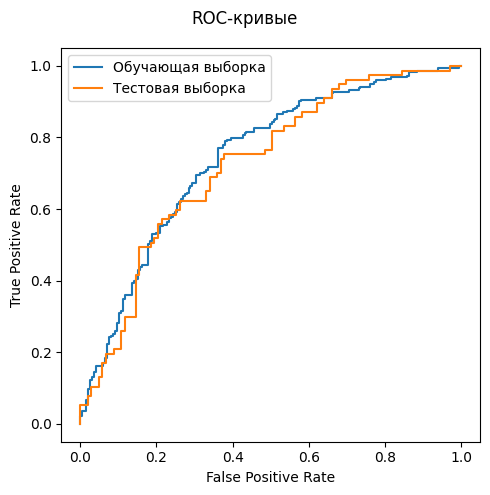

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
plt.suptitle('ROC-кривые')

pred_proba_train = model_logic.predict_proba(X_train_scaler)
fpr, tpr, thresholds = roc_curve(y_train, pred_proba_train[:,1])
disp = RocCurveDisplay(fpr=fpr, tpr=tpr)
disp.plot(ax=ax, label='Обучающая выборка')


pred_proba = model_logic.predict_proba(X_test_scaler)
fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:,1])
disp = RocCurveDisplay(fpr=fpr, tpr=tpr)
disp.plot(ax=ax, label='Тестовая выборка')
plt.legend()
plt.tight_layout()

In [ ]:
print('На обучающей выборке AUC-ROC =', roc_auc_score(y_train, model_logic.predict(X_train_scaler)))
print('На тестовой выборке AUC-ROC =', roc_auc_score(y_test, model_logic.predict(X_test_scaler)))

На обучающей выборке AUC-ROC = 0.7054471785299674
На тестовой выборке AUC-ROC = 0.6678855125457066


- Нельзя сказать, что качество предсказания отличное. Скорее всего качество предсказания нормально*, потому что очень далеко от точки 1 оси Оу.
- Метрики же нам дали тоже довольно плохие результаты. Даже не то что плохие, но не хорошие.

In [ ]:
print(f'Веса: {model_logic.coef_}\nСв. коэф.: {model_logic.intercept_}')

Веса: [[ 0.09859989  0.22038802 -0.04815141  0.25781848 -0.0524056  -0.11623991
  -0.26527733  0.2672194   0.06301834 -0.02016075 -0.60121748 -0.23790132
  -0.50397262 -0.13879208 -0.33138037]]
Св. коэф.: [0.1385565]


In [ ]:
data.head(1)

,Возраст,Пол,Квалификация,Стаж,Иждивенцы,Срок проживания,Иностранное гражданство,Телефон,Банковский счет,Сберегательный счет,Кредитный рейтинг,Число кредитов,Сумма,Срок,Процентная ставка платежа,Класс
0,44,1,3,2,1,4,1,1,-1,1,0,1,3384,6,1,0


In [ ]:
features = X.columns
feature_weighting = pd.DataFrame({'Признак': list(features), 'Вес': model_logic.coef_[0]})
feature_weighting = feature_weighting.sort_values(by='Вес')
feature_weighting

,Признак,Вес
10,Кредитный рейтинг,-0.601217
12,Сумма,-0.503973
14,Процентная ставка платежа,-0.331380
6,Иностранное гражданство,-0.265277
11,Число кредитов,-0.237901
13,Срок,-0.138792
5,Срок проживания,-0.116240
4,Иждивенцы,-0.052406
2,Квалификация,-0.048151
9,Сберегательный счет,-0.020161


- Можно заметить, что многие признаки имеют довольно маленький вес, что значит, что они не сильно влияют на выдачу кредитов. Однако например срок, банковский счет или сберегательный счет могут влиять на выдачу кредита. (вдруг у него на счету 1млн, а он берет кредит на 100к, ясен пень, что это может повлиять на выдачу больше, чем тот же телефон)

In [ ]:
data = pd.read_csv("Вариант 2.csv")
data.head(1)

,Возраст,Пол,Квалификация,Стаж,Семейное положение,Иждивенцы,Срок проживания,Иностранное гражданство,Телефон,Банковский счет,...,Плата за жилье,Кредитный рейтинг,Число кредитов,Другие кредиты,Сумма,Срок,Процентная ставка платежа,Поручители,Цель,Класс
0,44,1,3,2,живет раздельно/разведен,1,4,1,1,-1,...,аренда,0,1,нет,3384,6,1,нет,мебель/оборудование,0


In [ ]:
y = data['Класс']
X = data.drop('Класс', axis = 1)
X.head(1)

,Возраст,Пол,Квалификация,Стаж,Семейное положение,Иждивенцы,Срок проживания,Иностранное гражданство,Телефон,Банковский счет,...,Собственность,Плата за жилье,Кредитный рейтинг,Число кредитов,Другие кредиты,Сумма,Срок,Процентная ставка платежа,Поручители,Цель
0,44,1,3,2,живет раздельно/разведен,1,4,1,1,-1,...,недвижимость,аренда,0,1,нет,3384,6,1,нет,мебель/оборудование


In [ ]:
data_obj_columns = ['Семейное положение', 'Собственность', 'Плата за жилье', 'Другие кредиты', 'Поручители', 'Цель']

In [ ]:
data_num_columns = (X.drop(['Семейное положение', 'Собственность', 'Плата за жилье', 'Другие кредиты', 'Поручители', 'Цель'], axis = 1)).columns

In [ ]:
y_columns = 'Класс'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2, test_size = 0.3)

In [ ]:
model_standart = StandardScaler()
model_standart.fit(X_train[data_num_columns])
X_train_scaler = model_standart.transform(X_train[data_num_columns])
X_test_scaler = model_standart.transform(X_test[data_num_columns])

In [ ]:
OHE = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_ohe = OHE.fit_transform(X_train[data_obj_columns])
X_test_ohe = OHE.transform(X_test[data_obj_columns])

In [ ]:
X_train=np.hstack([X_train_scaler, X_train_ohe])
X_test=np.hstack([X_test_scaler, X_test_ohe])

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
print('На обучающей выборке:')
print('accuracy =', accuracy_score(y_train, model.predict(X_train)))
print('precision =', precision_score(y_train, model.predict(X_train)))
print('recall =', recall_score(y_train, model.predict(X_train)))
print('f-мера =', f1_score(y_train, model.predict(X_train)))
print()
print('На тестовой выборке:')
print('accuracy =', accuracy_score(y_test, model.predict(X_test)))
print('precision =', precision_score(y_test, model.predict(X_test)))
print('recall =', recall_score(y_test, model.predict(X_test)))
print('f-мера =', f1_score(y_test, model.predict(X_test)))

На обучающей выборке:
accuracy = 0.7142857142857143
precision = 0.7248908296943232
recall = 0.7443946188340808
f-мера = 0.7345132743362831

На тестовой выборке:
accuracy = 0.6944444444444444
precision = 0.6145833333333334
recall = 0.7662337662337663
f-мера = 0.6820809248554913


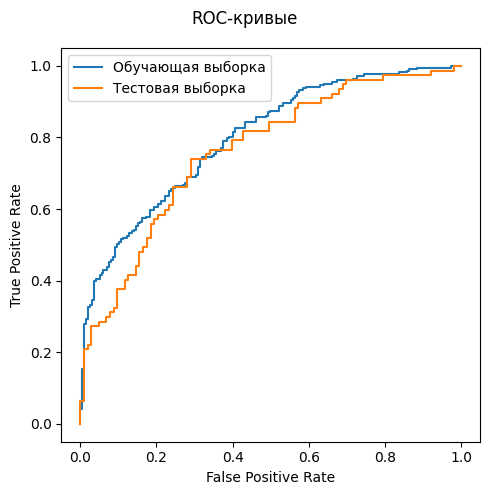

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
plt.suptitle('ROC-кривые')

pred_proba_train = model.predict_proba(X_train)
fpr, tpr, thresholds = roc_curve(y_train, pred_proba_train[:,1])
disp = RocCurveDisplay(fpr=fpr, tpr=tpr)
disp.plot(ax=ax, label='Обучающая выборка')


pred_proba = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:,1])
disp = RocCurveDisplay(fpr=fpr, tpr=tpr)
disp.plot(ax=ax, label='Тестовая выборка')
plt.legend()
plt.tight_layout()

In [ ]:
print('На обучающей выборке AUC-ROC =', roc_auc_score(y_train, model.predict(X_train)))
print('На тестовой выборке AUC-ROC =', roc_auc_score(y_test, model.predict(X_test)))

На обучающей выборке AUC-ROC = 0.71229883225968
На тестовой выборке AUC-ROC = 0.7035052326314462


Метрики качества стали немного выше, однако ROC-кривые прямо уже довольно заметно отличаются, качетсво работы модели улучшилось. Это значит, что категориальные признаки хорошо влияют на выдачу кредита.

In [ ]:
features = list(data_num_columns) + list(OHE.get_feature_names_out())
feature_weighting = pd.DataFrame({'Признак': features, 'Вес': model.coef_[0]})
feature_weighting = feature_weighting.sort_values(by='Вес')
feature_weighting

,Признак,Вес
38,Цель_образование,-0.887926
16,Семейное положение_живет раздельно/разведен,-0.621805
12,Сумма,-0.577065
10,Кредитный рейтинг,-0.567865
40,Цель_ремонт,-0.500252
21,Собственность_неизвестно/нет собственности,-0.422761
33,Цель_автомобиль (новый),-0.403453
14,Процентная ставка платежа,-0.394282
6,Иностранное гражданство,-0.374098
26,Другие кредиты_банк,-0.299892


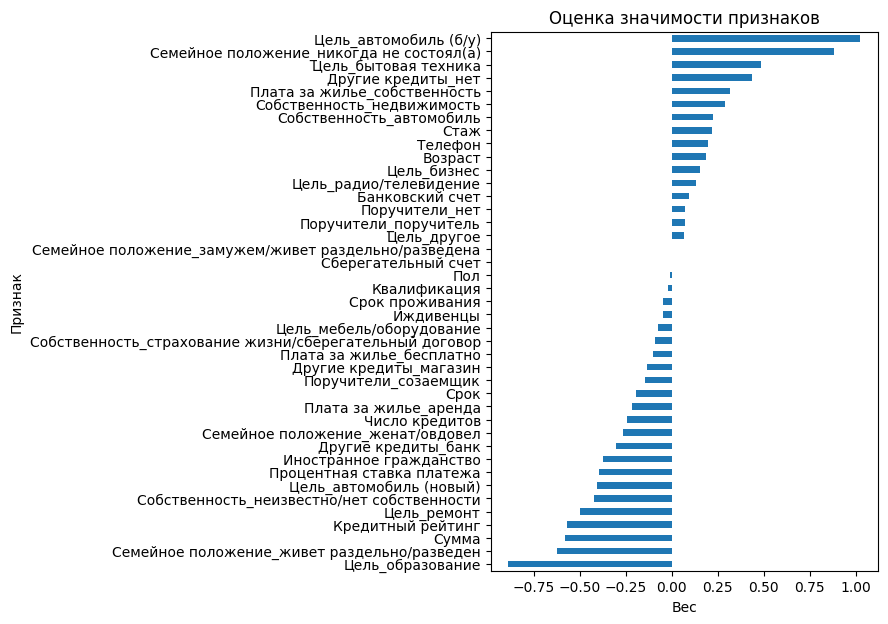

In [ ]:
feature_weighting.plot.barh(x='Признак', y='Вес', title='Оценка значимости признаков', figsize=(5,7), legend=False, xlabel='Вес')
plt.show()

Можно заметить, что многие категориальные значения довольно сильно влияют на вес (по крайней мере сильнее, чем количественный), например, если у человека цель образование, то это влияет в плохую сторону, а если цель автомобиль, то влиет в хорошую сторону (хотя это странно). То есть категориальные признаки довольно сильно влияют на выдачу кредитов.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2, test_size = 0.3)

In [ ]:
model_standart = StandardScaler()
model_standart.fit(X_train[data_num_columns])
X_train_scaler = model_standart.transform(X_train[data_num_columns])
X_test_scaler = model_standart.transform(X_test[data_num_columns])

In [ ]:
X_train_cat = X_train[data_obj_columns]
X_test_cat = X_test[data_obj_columns]

In [ ]:
X_train_cat.head(1)

,Семейное положение,Собственность,Плата за жилье,Другие кредиты,Поручители,Цель
471,женат/овдовел,недвижимость,собственность,нет,созаемщик,радио/телевидение


In [ ]:
for i in data_obj_columns:
  label_encoder = LabelEncoder()
  X_train_cat[i] = label_encoder.fit_transform(X_train_cat[i])
  X_test_cat[i] = label_encoder.fit_transform(X_test_cat[i])

<ipython-input-370-8ba239e1c97f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat[i] = label_encoder.fit_transform(X_train_cat[i])
<ipython-input-370-8ba239e1c97f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat[i] = label_encoder.fit_transform(X_test_cat[i])
<ipython-input-370-8ba239e1c97f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [ ]:
X_train_cat.head(1)

,Семейное положение,Собственность,Плата за жилье,Другие кредиты,Поручители,Цель
471,женат/овдовел,недвижимость,собственность,нет,созаемщик,радио/телевидение


In [ ]:
X_train=np.hstack([X_train_scaler, X_train_cat])
X_test=np.hstack([X_test_scaler, X_test_cat])

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
print('На обучающей выборке:')
print('accuracy =', accuracy_score(y_train, model.predict(X_train)))
print('precision =', precision_score(y_train, model.predict(X_train)))
print('recall =', recall_score(y_train, model.predict(X_train)))
print('f-мера =', f1_score(y_train, model.predict(X_train)))
print()
print('На тестовой выборке:')
print('accuracy =', accuracy_score(y_test, model.predict(X_test)))
print('precision =', precision_score(y_test, model.predict(X_test)))
print('recall =', recall_score(y_test, model.predict(X_test)))
print('f-мера =', f1_score(y_test, model.predict(X_test)))

На обучающей выборке:
accuracy = 0.7
precision = 0.7063829787234043
recall = 0.7443946188340808
f-мера = 0.7248908296943232

На тестовой выборке:
accuracy = 0.6722222222222223
precision = 0.5957446808510638
recall = 0.7272727272727273
f-мера = 0.6549707602339181


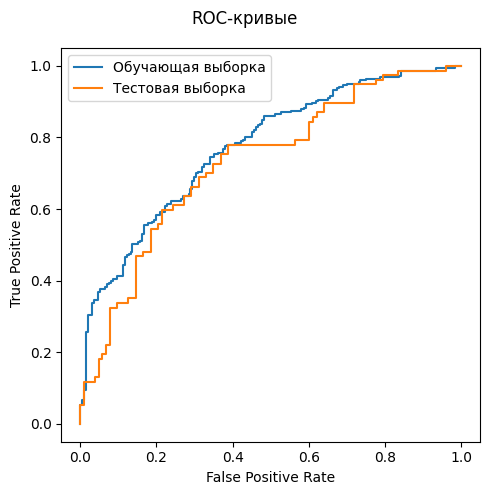

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
plt.suptitle('ROC-кривые')

pred_proba_train = model.predict_proba(X_train)
fpr, tpr, thresholds = roc_curve(y_train, pred_proba_train[:,1])
disp = RocCurveDisplay(fpr=fpr, tpr=tpr)
disp.plot(ax=ax, label='Обучающая выборка')


pred_proba = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:,1])
disp = RocCurveDisplay(fpr=fpr, tpr=tpr)
disp.plot(ax=ax, label='Тестовая выборка')
plt.legend()
plt.tight_layout()

In [ ]:
print('На обучающей выборке AUC-ROC =', roc_auc_score(y_train, model.predict(X_train)))
print('На тестовой выборке AUC-ROC =', roc_auc_score(y_test, model.predict(X_test)))

На обучающей выборке AUC-ROC = 0.6970704058637409
На тестовой выборке AUC-ROC = 0.6791703442188879


Такое чувство, что с такой кодировкой модель стала показывать результаты чуть хуже. (метрику и рок кривые)

In [ ]:
features = X.columns
feature_weighting = pd.DataFrame({'Признак': features, 'Вес': model.coef_[0]})
feature_weighting = feature_weighting.sort_values(by='Вес')
feature_weighting

,Признак,Вес
12,Плата за жилье,-0.590284
10,Сберегательный счет,-0.563250
14,Число кредитов,-0.399162
6,Срок проживания,-0.372785
11,Собственность,-0.258918
16,Сумма,-0.187932
13,Кредитный рейтинг,-0.144640
19,Поручители,-0.083761
4,Семейное положение,-0.074145
5,Иждивенцы,-0.060190


Теперь категориальные признаки показывают как вклад в итог выдачи в общем, а не определенные значения. Это не так плохо, однако предсказывание стало чуть хуже.

Таким образом, мы заметили, что категориальные признаки очень сильно решают на выдачу кредитов. Больше же точность была у бинарного кодирования (благодаря нему модель смогла сделать более точные предсказания), из чего мы можем сделать вывод о более хорошем методе кодирования категориальных признаков.

Задание 3, давайте сначала скопируем задание 2 с бинарным кодированием.

In [ ]:
data = pd.read_csv("Вариант 2.csv")
data.head(1)

,Возраст,Пол,Квалификация,Стаж,Семейное положение,Иждивенцы,Срок проживания,Иностранное гражданство,Телефон,Банковский счет,...,Плата за жилье,Кредитный рейтинг,Число кредитов,Другие кредиты,Сумма,Срок,Процентная ставка платежа,Поручители,Цель,Класс
0,44,1,3,2,живет раздельно/разведен,1,4,1,1,-1,...,аренда,0,1,нет,3384,6,1,нет,мебель/оборудование,0


In [ ]:
y = data['Класс']
X = data.drop('Класс', axis = 1)
X.head(1)

,Возраст,Пол,Квалификация,Стаж,Семейное положение,Иждивенцы,Срок проживания,Иностранное гражданство,Телефон,Банковский счет,...,Собственность,Плата за жилье,Кредитный рейтинг,Число кредитов,Другие кредиты,Сумма,Срок,Процентная ставка платежа,Поручители,Цель
0,44,1,3,2,живет раздельно/разведен,1,4,1,1,-1,...,недвижимость,аренда,0,1,нет,3384,6,1,нет,мебель/оборудование


In [ ]:
data_obj_columns = ['Семейное положение', 'Собственность', 'Плата за жилье', 'Другие кредиты', 'Поручители', 'Цель']

In [ ]:
data_num_columns = (X.drop(['Семейное положение', 'Собственность', 'Плата за жилье', 'Другие кредиты', 'Поручители', 'Цель'], axis = 1)).columns

In [ ]:
y_columns = 'Класс'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2, test_size = 0.3)

In [ ]:
model_standart = StandardScaler()
model_standart.fit(X_train[data_num_columns])
X_train_scaler = model_standart.transform(X_train[data_num_columns])
X_test_scaler = model_standart.transform(X_test[data_num_columns])

In [ ]:
OHE = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_ohe = OHE.fit_transform(X_train[data_obj_columns])
X_test_ohe = OHE.transform(X_test[data_obj_columns])

In [ ]:
X_train=np.hstack([X_train_scaler, X_train_ohe])
X_test=np.hstack([X_test_scaler, X_test_ohe])

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
print('На обучающей выборке:')
print('accuracy =', accuracy_score(y_train, model.predict(X_train)))
print('precision =', precision_score(y_train, model.predict(X_train)))
print('recall =', recall_score(y_train, model.predict(X_train)))
print('f-мера =', f1_score(y_train, model.predict(X_train)))
print()
print('На тестовой выборке:')
print('accuracy =', accuracy_score(y_test, model.predict(X_test)))
print('precision =', precision_score(y_test, model.predict(X_test)))
print('recall =', recall_score(y_test, model.predict(X_test)))
print('f-мера =', f1_score(y_test, model.predict(X_test)))

На обучающей выборке:
accuracy = 0.7142857142857143
precision = 0.7248908296943232
recall = 0.7443946188340808
f-мера = 0.7345132743362831

На тестовой выборке:
accuracy = 0.6944444444444444
precision = 0.6145833333333334
recall = 0.7662337662337663
f-мера = 0.6820809248554913


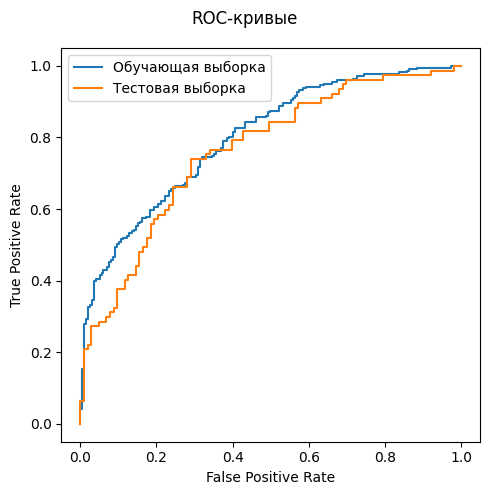

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
plt.suptitle('ROC-кривые')

pred_proba_train = model.predict_proba(X_train)
fpr, tpr, thresholds = roc_curve(y_train, pred_proba_train[:,1])
disp = RocCurveDisplay(fpr=fpr, tpr=tpr)
disp.plot(ax=ax, label='Обучающая выборка')


pred_proba = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:,1])
disp = RocCurveDisplay(fpr=fpr, tpr=tpr)
disp.plot(ax=ax, label='Тестовая выборка')
plt.legend()
plt.tight_layout()

In [ ]:
print('На обучающей выборке AUC-ROC =', roc_auc_score(y_train, model.predict(X_train)))
print('На тестовой выборке AUC-ROC =', roc_auc_score(y_test, model.predict(X_test)))

На обучающей выборке AUC-ROC = 0.71229883225968
На тестовой выборке AUC-ROC = 0.7035052326314462


In [ ]:
features = list(data_num_columns) + list(OHE.get_feature_names_out())
feature_weighting = pd.DataFrame({'Признак': features, 'Вес': model.coef_[0]})
feature_weighting = feature_weighting.sort_values(by='Вес')
feature_weighting

,Признак,Вес
38,Цель_образование,-0.887926
16,Семейное положение_живет раздельно/разведен,-0.621805
12,Сумма,-0.577065
10,Кредитный рейтинг,-0.567865
40,Цель_ремонт,-0.500252
21,Собственность_неизвестно/нет собственности,-0.422761
33,Цель_автомобиль (новый),-0.403453
14,Процентная ставка платежа,-0.394282
6,Иностранное гражданство,-0.374098
26,Другие кредиты_банк,-0.299892


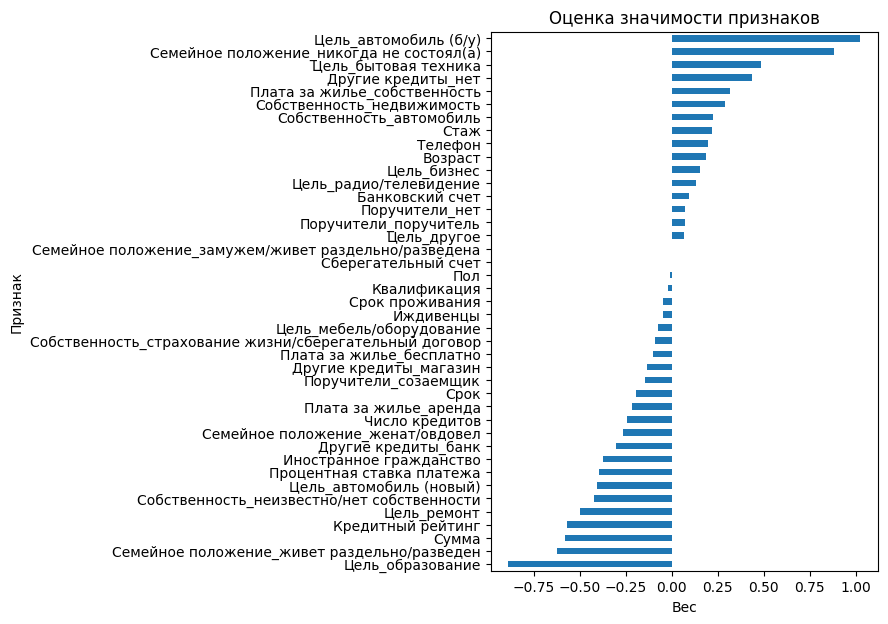

In [ ]:
feature_weighting.plot.barh(x='Признак', y='Вес', title='Оценка значимости признаков', figsize=(5,7), legend=False, xlabel='Вес')
plt.show()

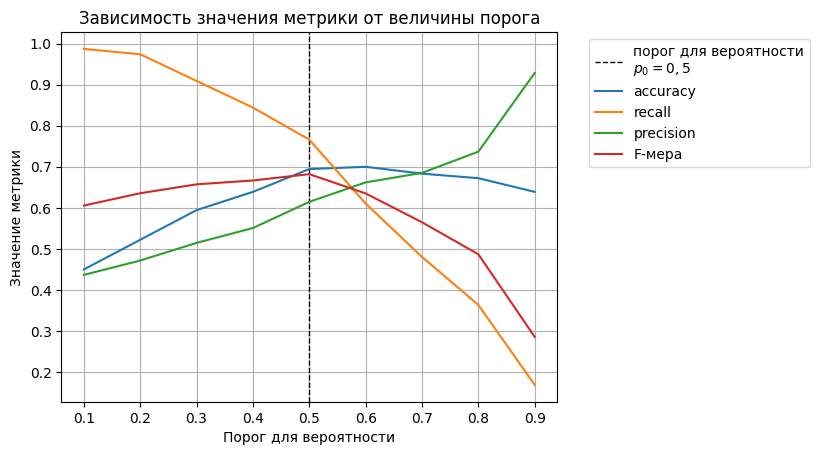

In [ ]:
thresholds = np.arange(0.1, 1, 0.1)
Accuracy = [accuracy_score(y_test, pred_proba[:,1] > t) for t in thresholds]
Precision = [precision_score(y_test, pred_proba[:,1] > t) for t in thresholds]
Recall = [recall_score(y_test, pred_proba[:,1] > t) for t in thresholds]
F1 = [f1_score(y_test, pred_proba[:,1] > t) for t in thresholds]

plt.axvline(0.5, linestyle='--', color='k', linewidth=1, label='порог для вероятности\n$p_0=0,5$')
plt.plot(thresholds, Accuracy, label='accuracy')
plt.plot(thresholds, Recall, label='recall')
plt.plot(thresholds, Precision, label='precision')
plt.plot(thresholds, F1, label='F-мера')
plt.xticks(thresholds)
plt.xlabel('Порог для вероятности')
plt.ylabel('Значение метрики')
plt.title('Зависимость значения метрики от величины порога')
plt.legend(bbox_to_anchor=[1.05, 1])
plt.grid()
plt.show()

Если посмотреть, то более качественную модель трудно подобрать, потому что довольно резко ходят метрики, однако, если подумать, то при выдаче кредитов важно, чтобы люди и брали кредиты, и чтобы банк не обанкротился, это значит, что выжно, чтобы были сбалансированы метрики recall и precision, и чтобы метрика accuracy былп как можно выше, однако здесь почти максимальное значение accuracу и уже максимальное F-мера. Это значит, что модель работает довольно хорошо, но не факт, что если мы выдадим кредит человеку, который не сможет его полностью выплатить, то мы уйдем в минус, поэтому можно будет снизить метрику правильных ответов и раздать кредитов чуть больше, то есть больше, чтобы мы давали кредит, то есть завысить метрику recall, но не сильно, чтобы другие не так сильно менялись, например 0.4 или 0.3 пороги

In [ ]:
p_0 = 0.3
y_pred_train = model.predict_proba(X_train)[:,1] > p_0
y_pred = pred_proba[:,1] > p_0

print(f'Для порога p = {p_0} (на тестовой выборке):')
print('accuracy =', accuracy_score(y_test, y_pred))
print('precision =', precision_score(y_test, y_pred))
print('recall =', recall_score(y_test, y_pred))
print('f-мера =', f1_score(y_test, y_pred))

Для порога p = 0.3 (на тестовой выборке):
accuracy = 0.5944444444444444
precision = 0.5147058823529411
recall = 0.9090909090909091
f-мера = 0.6572769953051643


In [ ]:
p_0 = 0.4
y_pred_train = model.predict_proba(X_train)[:,1] > p_0
y_pred = pred_proba[:,1] > p_0

print(f'Для порога p = {p_0} (на тестовой выборке):')
print('accuracy =', accuracy_score(y_test, y_pred))
print('precision =', precision_score(y_test, y_pred))
print('recall =', recall_score(y_test, y_pred))
print('f-мера =', f1_score(y_test, y_pred))

Для порога p = 0.4 (на тестовой выборке):
accuracy = 0.6388888888888888
precision = 0.5508474576271186
recall = 0.8441558441558441
f-мера = 0.6666666666666666


In [ ]:
p_0 = 0.35
y_pred_train = model.predict_proba(X_train)[:,1] > p_0
y_pred = pred_proba[:,1] > p_0

print(f'Для порога p = {p_0} (на тестовой выборке):')
print('accuracy =', accuracy_score(y_test, y_pred))
print('precision =', precision_score(y_test, y_pred))
print('recall =', recall_score(y_test, y_pred))
print('f-мера =', f1_score(y_test, y_pred))

Для порога p = 0.35 (на тестовой выборке):
accuracy = 0.6277777777777778
precision = 0.5390625
recall = 0.8961038961038961
f-мера = 0.6731707317073171


Я бы остановился на p = 0.35, потому что дальше идти некуда. Или вообще вернулся бы к исходным данным.